In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [88]:
df=pd.read_csv(r"C:\Users\muham\Data Science Projects\Time Series\data (1)\PT_Train.csv")

In [89]:
df.head()

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


# Statistical Analyis

In [90]:
df.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp (GMT)             226 non-null    object 
 1   Lifetouch Heart Rate        226 non-null    int64  
 2   Lifetouch Respiration Rate  226 non-null    int64  
 3   Oximeter SpO2               191 non-null    float64
 4   Oximeter Pulse              191 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.0+ KB


# Cleaning the Data

In [92]:
df.drop(['Lifetouch Respiration Rate','Oximeter SpO2','Oximeter Pulse'],axis=1,inplace=True)

In [93]:
df

,Timestamp (GMT),Lifetouch Heart Rate
0,17/08/2015 15:09,139
1,17/08/2015 15:10,144
2,17/08/2015 15:11,140
3,17/08/2015 15:12,138
4,17/08/2015 15:13,133
...,...,...
221,17/08/2015 18:50,159
222,17/08/2015 18:51,151
223,17/08/2015 18:52,140
224,17/08/2015 18:53,140


# Detecting and Removing outliers

In [94]:
def detect_outliers(df, column):
    threshold = 3
    mean = np.mean(df[column])
    std = np.std(df[column])
    
    z_scores = [(y - mean) / std for y in df[column]]
    df = df[np.abs(z_scores) <= threshold]
    return df


df = detect_outliers(df, "Lifetouch Heart Rate")
print(df)


      Timestamp (GMT)  Lifetouch Heart Rate
0    17/08/2015 15:09                   139
1    17/08/2015 15:10                   144
2    17/08/2015 15:11                   140
3    17/08/2015 15:12                   138
4    17/08/2015 15:13                   133
..                ...                   ...
221  17/08/2015 18:50                   159
222  17/08/2015 18:51                   151
223  17/08/2015 18:52                   140
224  17/08/2015 18:53                   140
225  17/08/2015 18:54                   138

[218 rows x 2 columns]


# Checking for missing values

In [95]:
df.isna().sum()

Timestamp (GMT)         0
Lifetouch Heart Rate    0
dtype: int64

In [96]:
# Convert Month into Datetime
df['Timestamp (GMT)']=pd.to_datetime(df['Timestamp (GMT)'])

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
df.set_index('Timestamp (GMT)',inplace=True)

In [98]:
df.head()

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133


# Visualizing using Matplotlib

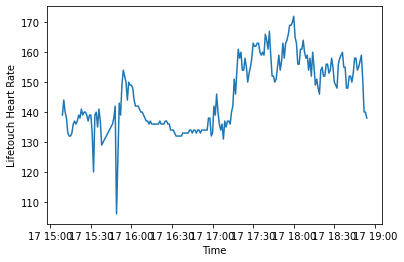

In [99]:
plt.plot(df['Lifetouch Heart Rate'])
plt.ylabel('Lifetouch Heart Rate')
plt.xlabel('Time')
plt.grid(False)
plt.show()

# Simple exponential smoothing

In [100]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
data=df['Lifetouch Heart Rate']
fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)

fit2=SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


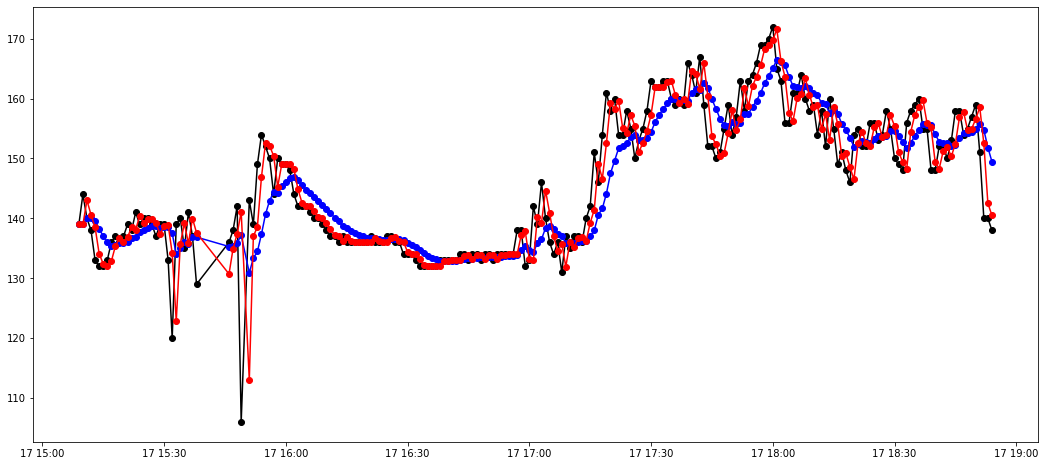

In [101]:
plt.figure(figsize=(18,8))
plt.plot(df['Lifetouch Heart Rate'],marker='o',color='black')

plt.plot(fit1.fittedvalues,marker='o',color='blue')

plt.plot(fit2.fittedvalues,marker='o',color='red')

# Holt method for exponential

In [102]:
fit1=Holt(data).fit()

fit1=Holt(data,exponential=True).fit()

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


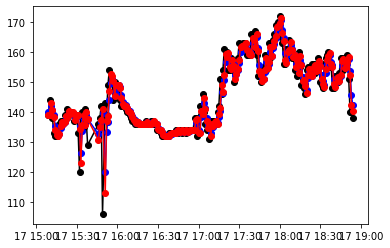

In [103]:

plt.plot(data,marker='o',color='black')

plt.plot(fit1.fittedvalues,marker='o',color='blue')

plt.plot(fit2.fittedvalues,marker='o',color='red')

In [104]:
df

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133
...,...
2015-08-17 18:50:00,159
2015-08-17 18:51:00,151
2015-08-17 18:52:00,140


# Performing Add_fuller test

In [105]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(s):
    result=adfuller(s)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [106]:
adfuller_test(df['Lifetouch Heart Rate'])

ADF Test Statistic : -2.3604265607058523
p-value : 0.15321854643586408
#Lags Used : 1
Number of Observations Used : 216
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Auto Regressive Mode

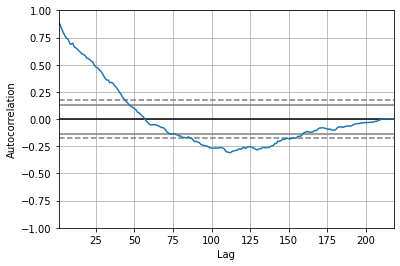

In [107]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Lifetouch Heart Rate'])
plt.show()

# Differencing to make data stationary

In [108]:
df['Seasonal First Difference']=df['Lifetouch Heart Rate']-df['Lifetouch Heart Rate'].shift(1)

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
df['Seasonal First Difference']

Timestamp (GMT)
2015-08-17 15:09:00     NaN
2015-08-17 15:10:00     5.0
2015-08-17 15:11:00    -4.0
2015-08-17 15:12:00    -2.0
2015-08-17 15:13:00    -5.0
                       ... 
2015-08-17 18:50:00     2.0
2015-08-17 18:51:00    -8.0
2015-08-17 18:52:00   -11.0
2015-08-17 18:53:00     0.0
2015-08-17 18:54:00    -2.0
Name: Seasonal First Difference, Length: 218, dtype: float64

In [110]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.347715074208303
p-value : 4.357784760569853e-06
#Lags Used : 9
Number of Observations Used : 207
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [111]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


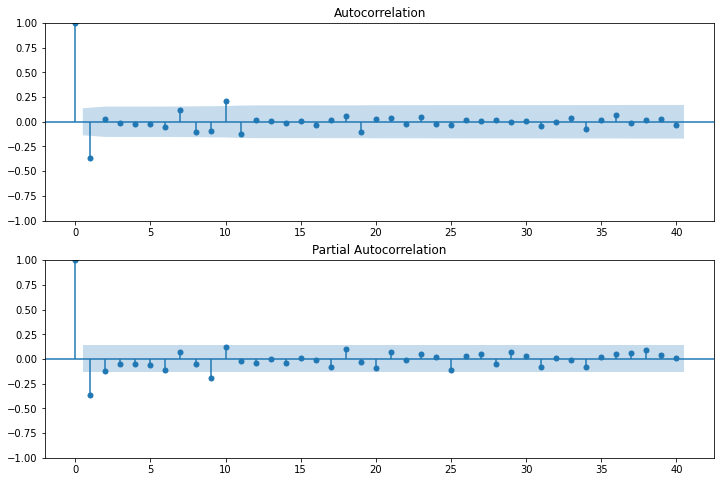

In [112]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

# Fitting SARIMAX model

In [113]:
model=sm.tsa.statespace.SARIMAX(df['Lifetouch Heart Rate'],order=(1, 1, 0),seasonal_order=(1,1,1,50))
results=model.fit()

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


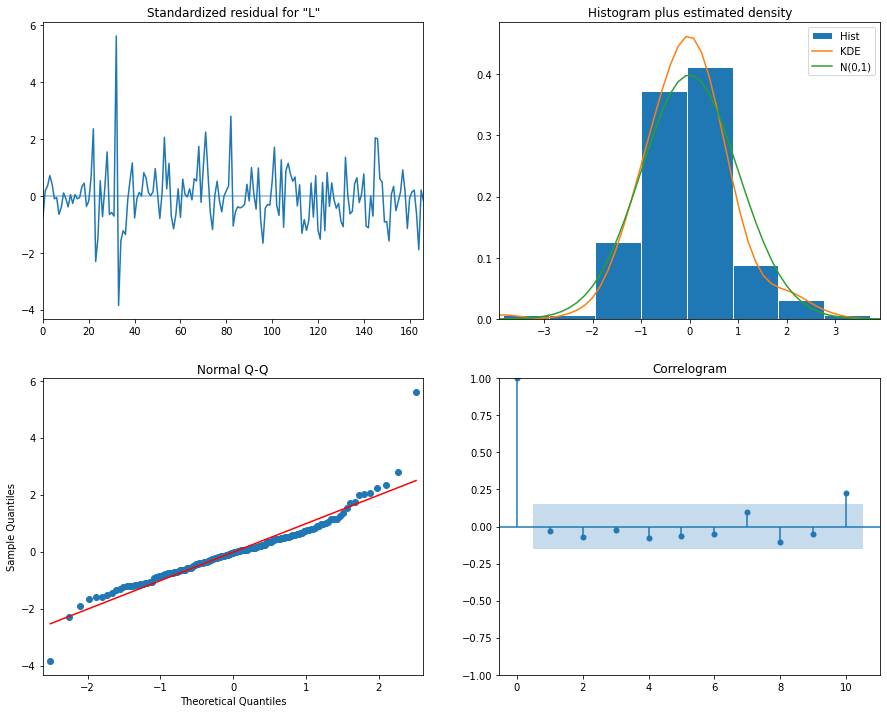

In [114]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Testing the trained Model on Test Data

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Timestamp (GMT)'>

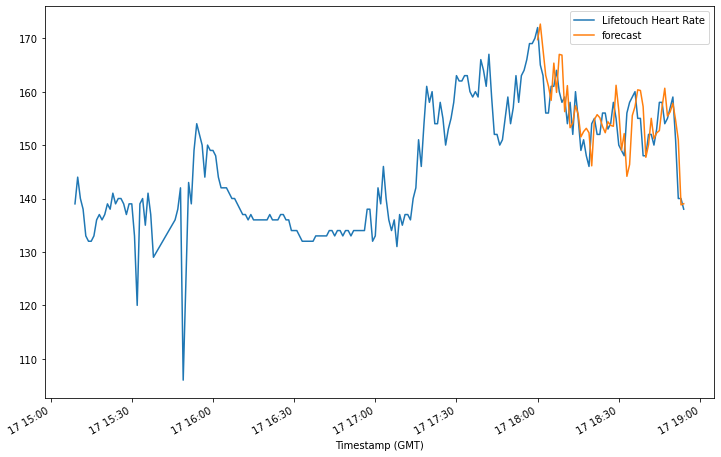

In [116]:
df['forecast']=results.predict(start='2015-08-17 18:00:00',end='2015-08-17 18:54:00',dynamic=False)
df[['Lifetouch Heart Rate','forecast']].plot(figsize=(12,8))

# Evaluating model

In [118]:
actuals=df['2015-08-17 18:12:00':'2015-08-17 18:54:00']['Lifetouch Heart Rate']
predictions=results.predict(start='2015-08-17 18:12:00',end='2015-08-17 18:54:00',dynamic=False)
rmse=np.sqrt((predictions-actuals)**2).mean()
print('Mean Square Error :',rmse)

Mean Square Error : 3.69135921275982


In [119]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(actuals,predictions)
print('Mean Absolute Error :',mae)

Mean Absolute Error : 3.69135921275982


# Predicting Lifetouch Heart Rate for next twenty minutes

In [146]:
from datetime import datetime, timedelta

# Parse the start and end date and time strings into datetime objects
start_dt = datetime.strptime("17/08/2015 18:55", "%d/%m/%Y %H:%M")
end_dt = datetime.strptime("17/08/2015 19:14", "%d/%m/%Y %H:%M")

# Create a list to store the datetime objects
datetime_list = []

# Generate a list of datetime objects starting from the start_dt,
# incrementing by one minute, and ending at the end_dt
current_dt = start_dt
while current_dt <= end_dt:
    datetime_list.append(current_dt)
    current_dt += timedelta(minutes=1)

# Format the datetime objects in the list to the desired string format
formatted_datetime_list = [dt.strftime("%d/%m/%Y %H:%M") for dt in datetime_list]

# Output the result
print(formatted_datetime_list)


['17/08/2015 18:55', '17/08/2015 18:56', '17/08/2015 18:57', '17/08/2015 18:58', '17/08/2015 18:59', '17/08/2015 19:00', '17/08/2015 19:01', '17/08/2015 19:02', '17/08/2015 19:03', '17/08/2015 19:04', '17/08/2015 19:05', '17/08/2015 19:06', '17/08/2015 19:07', '17/08/2015 19:08', '17/08/2015 19:09', '17/08/2015 19:10', '17/08/2015 19:11', '17/08/2015 19:12', '17/08/2015 19:13', '17/08/2015 19:14']


In [147]:
forecast=results.get_forecast(steps=20)

predict=re.predicted_mean
ci=re.conf_int()

C:\Users\muham\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [152]:

predict.index = datetime_list
# printitng the prediction for next 20 minutes
print(predict)


2015-08-17 18:55:00    142.700617
2015-08-17 18:56:00    143.917294
2015-08-17 18:57:00    145.090693
2015-08-17 18:58:00    143.956772
2015-08-17 18:59:00    143.446841
2015-08-17 19:00:00    142.709760
2015-08-17 19:01:00    141.013978
2015-08-17 19:02:00    142.445585
2015-08-17 19:03:00    138.124445
2015-08-17 19:04:00    144.483975
2015-08-17 19:05:00    140.398118
2015-08-17 19:06:00    135.028238
2015-08-17 19:07:00    137.342792
2015-08-17 19:08:00    135.985310
2015-08-17 19:09:00    135.502219
2015-08-17 19:10:00    139.438058
2015-08-17 19:11:00    142.203293
2015-08-17 19:12:00    139.996131
2015-08-17 19:13:00    140.903757
2015-08-17 19:14:00    143.825911
Name: predicted_mean, dtype: float64


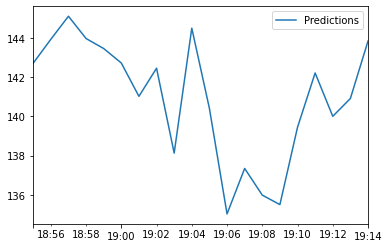

In [153]:
predict.plot(label='Predictions')

plt.legend()
plt.show()